In [25]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import h2o
from h2o.automl import H2OAutoML
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 15.0.2+7-27, mixed mode, sharing)
  Starting server from C:\ProgramData\Anaconda3\lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\ayush\AppData\Local\Temp\tmp1e5xwr4l
  JVM stdout: C:\Users\ayush\AppData\Local\Temp\tmp1e5xwr4l\h2o_ayush_started_from_python.out
  JVM stderr: C:\Users\ayush\AppData\Local\Temp\tmp1e5xwr4l\h2o_ayush_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,08 secs
H2O_cluster_timezone:,Asia/Kolkata
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.32.1.4
H2O_cluster_version_age:,18 days
H2O_cluster_name:,H2O_from_python_ayush_05t67w
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,880 Mb
H2O_cluster_total_cores:,0
H2O_cluster_allowed_cores:,0
H2O_cluster_status:,"accepting new members, healthy"


In [3]:
data_path=r'train.csv'

In [4]:
df=h2o.import_file(data_path)

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [5]:
df

Sentiment score,Post Length,Hashtag count,Content URL count,Tweet count,Followers count,Listed Count,Media Type,Mentions Count,Post author verified,Likes,Shares,Comments,Impact
0,17,0,0,3.29077e-05,1.16218e-06,0,1,0,0,0,0,0,0
19.3,84,0,1,0.00632233,0.0124805,0.00959976,1,0,1,0.000109988,1.25516e-05,0,110
0,78,0,0,0.000792481,1.36315e-05,0,1,0,0,0,0,0,0
0,284,2,0,0.000159484,0.000237599,4.57634e-05,1,0,1,0.00505945,0.0027488,5.97559e-05,6830
-20,80,0,1,0.00418277,2.08405e-05,0,0,0,0,0,0,0,0
14.71,57,0,0,0.000275117,8.73816e-09,0,0,0,0,0,0,0,0
-13.73,280,1,1,0.00186603,4.53598e-05,4.04831e-05,1,0,0,0.00148484,0.000502065,5.97559e-05,1790
17.16,171,0,1,0.00404262,0.00443262,0.0129634,1,0,1,0.0192809,0.00257308,0,19580
16.95,143,1,1,0.00108952,0.00205492,0.00185694,0,0,1,3.29964e-05,0,0,30
0,191,2,1,3.76655e-07,7.86434e-08,0,1,1,0,0,0,0,0


In [6]:
y='Impact'
x=df.columns

In [7]:
aml = H2OAutoML(max_models=10,seed=1)
aml.train(x=x,y=y,training_frame=df)

AutoML progress: |
21:10:17.625: AutoML: XGBoost is not available; skipping it.

████████████████████████████████████████████████████████| 100%


In [10]:
lb = aml.leaderboard

In [11]:
lb

model_id,mean_residual_deviance,rmse,mse,mae,rmsle
StackedEnsemble_AllModels_AutoML_20210726_211017,2.42096e+06,1555.94,2.42096e+06,492.109,nan
StackedEnsemble_BestOfFamily_AutoML_20210726_211017,2.68021e+06,1637.13,2.68021e+06,514.52,nan
DeepLearning_1_AutoML_20210726_211017,3.05833e+06,1748.81,3.05833e+06,560.639,nan
GBM_grid__1_AutoML_20210726_211017_model_1,9.18237e+06,3030.24,9.18237e+06,888.679,nan
GBM_1_AutoML_20210726_211017,1.14255e+07,3380.16,1.14255e+07,991.98,nan
GBM_2_AutoML_20210726_211017,1.38567e+07,3722.45,1.38567e+07,994.778,nan
GBM_3_AutoML_20210726_211017,1.91479e+07,4375.83,1.91479e+07,1556.84,nan
GBM_4_AutoML_20210726_211017,3.0768e+07,5546.89,3.0768e+07,1858.94,nan
XRT_1_AutoML_20210726_211017,4.09746e+07,6401.14,4.09746e+07,1234.18,0.920783
DRF_1_AutoML_20210726_211017,4.92339e+07,7016.69,4.92339e+07,1289.46,0.809138


In [12]:
#get model ids for all models in automl leaderboard
model_ids = list(aml.leaderboard['model_id'].as_data_frame().iloc[:,0])

In [13]:
#get the All models styacked ensemble model
se = h2o.get_model([mid for mid in model_ids if 'StackedEnsemble_AllModels' in mid][0])

In [14]:
se

Model Details
H2OStackedEnsembleEstimator :  Stacked Ensemble
Model Key:  StackedEnsemble_AllModels_AutoML_20210726_211017

No model summary for this model

ModelMetricsRegressionGLM: stackedensemble
** Reported on train data. **

MSE: 1437847.5163516982
RMSE: 1199.1027964072548
MAE: 366.7632453750438
RMSLE: NaN
R^2: 0.9998529327451755
Mean Residual Deviance: 1437847.5163516982
Null degrees of freedom: 9966
Residual degrees of freedom: 9960
Null deviance: 97473569997743.12
Residual deviance: 14331026195.477375
AIC: 169619.80274381713

ModelMetricsRegressionGLM: stackedensemble
** Reported on cross-validation data. **

MSE: 2420960.007684957
RMSE: 1555.9434461717935
MAE: 492.1085658718752
RMSLE: NaN
R^2: 0.9997721321529078
Mean Residual Deviance: 2420960.007684957
Null degrees of freedom: 49999
Residual degrees of freedom: 49994
Null deviance: 531230758321757.8
Residual deviance: 121048000384.24785
AIC: 876891.5891634544


In [26]:
#get the stacked ensemble meta learner model
metalearner = h2o.get_model(se.metalearner()['name'])

In [27]:
metalearner.coef_norm()

{'Intercept': 40038.7356000001,
 'DeepLearning_1_AutoML_20210726_211017': 63960.74656276642,
 'GBM_grid__1_AutoML_20210726_211017_model_1': 28476.988301243557,
 'GBM_1_AutoML_20210726_211017': 9484.605536651812,
 'GBM_2_AutoML_20210726_211017': 729.7704775632507,
 'GBM_3_AutoML_20210726_211017': 0.7792132394279722,
 'GBM_4_AutoML_20210726_211017': 323.8170126710409,
 'XRT_1_AutoML_20210726_211017': 0.0,
 'DRF_1_AutoML_20210726_211017': 0.0,
 'GBM_5_AutoML_20210726_211017': 0.0,
 'GLM_1_AutoML_20210726_211017': 0.0}

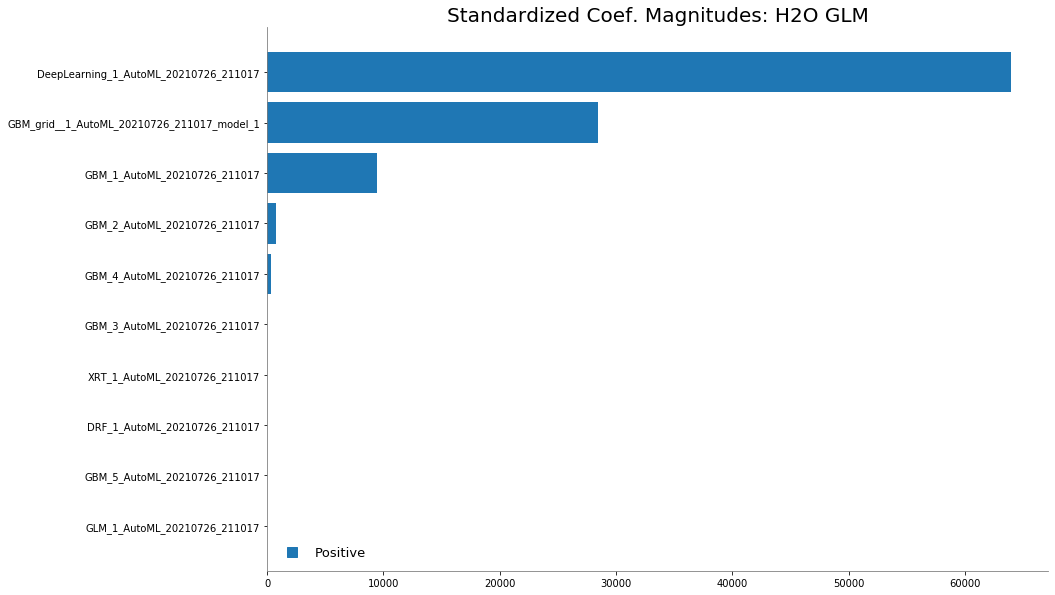

In [28]:
%matplotlib inline
metalearner.std_coef_plot()

In [29]:
twitter_h2o_dl = h2o.get_model("DeepLearning_1_AutoML_20210726_211017")

In [30]:
twitter_h2o_dl

Model Details
H2ODeepLearningEstimator :  Deep Learning
Model Key:  DeepLearning_1_AutoML_20210726_211017


Status of Neuron Layers: predicting Impact, regression, gaussian distribution, Quadratic loss, 371 weights/biases, 10.5 KB, 520,271 training samples, mini-batch size 1


,,layer,units,type,dropout,l1,l2,mean_rate,rate_rms,momentum,mean_weight,weight_rms,mean_bias,bias_rms
0,,1,13,Input,0.0,,,,,,,,,
1,,2,10,Rectifier,0.0,0.0,0.0,0.160023,0.214611,0.0,0.036159,0.164801,0.366264,0.332544
2,,3,10,Rectifier,0.0,0.0,0.0,0.218691,0.350146,0.0,-0.007445,0.340356,0.929698,0.202126
3,,4,10,Rectifier,0.0,0.0,0.0,0.13055,0.278436,0.0,-0.004459,0.30032,0.988066,0.050327
4,,5,1,Linear,,0.0,0.0,0.001919,0.001142,0.0,0.067955,0.370315,0.005599,0.0




ModelMetricsRegression: deeplearning
** Reported on train data. **

MSE: 968442.1509364406
RMSE: 984.0945843446353
MAE: 275.02333762501155
RMSLE: NaN
Mean Residual Deviance: 968442.1509364406

ModelMetricsRegression: deeplearning
** Reported on cross-validation data. **

MSE: 3058334.842214018
RMSE: 1748.8095500122413
MAE: 560.6386783544227
RMSLE: NaN
Mean Residual Deviance: 3058334.842214018

Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,mae,560.6387,327.58612,225.75624,655.015,486.3539,362.27246,1073.7958
1,mean_residual_deviance,3058334.8,1470631.6,4586535.5,3680360.8,1491816.8,1481105.2,4051855.8
2,mse,3058334.8,1470631.6,4586535.5,3680360.8,1491816.8,1481105.2,4051855.8
3,r2,0.9997157,1.272609E-4,0.99960285,0.9996306,0.99986213,0.99984634,0.99963635
4,residual_deviance,3058334.8,1470631.6,4586535.5,3680360.8,1491816.8,1481105.2,4051855.8
5,rmse,1702.275,448.044,2141.6199,1918.4266,1221.3995,1217.0067,2012.9222
6,rmsle,NaN,0.0,NaN,NaN,NaN,NaN,NaN



Scoring History: 


,,timestamp,duration,training_speed,epochs,iterations,samples,training_rmse,training_deviance,training_mae,training_r2
0,,2021-07-26 21:22:28,0.000 sec,None,0.00000,0,0.0,NaN,NaN,NaN,NaN
1,,2021-07-26 21:22:29,1 min 13.514 sec,102822 obs/sec,1.04056,1,52028.0,5241.659882,2.747500e+07,1937.381085,0.997374
2,,2021-07-26 21:22:37,1 min 16.905 sec,134925 obs/sec,10.40542,10,520271.0,984.094584,9.684422e+05,275.023338,0.999907



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,Likes,1.000000,1.000000,0.189615
1,Comments,0.900037,0.900037,0.170661
2,Tweet count,0.668586,0.668586,0.126774
3,Followers count,0.649391,0.649391,0.123135
4,Shares,0.542397,0.542397,0.102847
5,Listed Count,0.431741,0.431741,0.081865
6,Post author verified,0.351979,0.351979,0.066741
7,Mentions Count,0.209596,0.209596,0.039743
8,Hashtag count,0.131070,0.131070,0.024853
9,Content URL count,0.129694,0.129694,0.024592


In [31]:
twitter_h2o_gbm = h2o.get_model("GBM_grid__1_AutoML_20210726_211017_model_1")

In [32]:
twitter_h2o_gbm

Model Details
H2OGradientBoostingEstimator :  Gradient Boosting Machine
Model Key:  GBM_grid__1_AutoML_20210726_211017_model_1


Model Summary: 


,,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
0,,306.0,306.0,62756.0,4.0,4.0,4.0,5.0,16.0,11.594771




ModelMetricsRegression: gbm
** Reported on train data. **

MSE: 3007256.7929180665
RMSE: 1734.1443979432815
MAE: 712.5618769603276
RMSLE: NaN
Mean Residual Deviance: 3007256.7929180665

ModelMetricsRegression: gbm
** Reported on cross-validation data. **

MSE: 9182369.93822578
RMSE: 3030.2425543553077
MAE: 888.6788547204393
RMSLE: NaN
Mean Residual Deviance: 9182369.93822578

Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,mae,888.67883,186.70522,822.12225,1123.6825,616.32214,950.68506,930.5822
1,mean_residual_deviance,9182370.0,3400946.2,1.064878E7,1.2766557E7,3804360.0,8275470.0,1.0416683E7
2,mse,9182370.0,3400946.2,1.064878E7,1.2766557E7,3804360.0,8275470.0,1.0416683E7
3,r2,0.99913037,3.3356415E-4,0.999078,0.9987186,0.99964845,0.9991416,0.99906516
4,residual_deviance,9182370.0,3400946.2,1.064878E7,1.2766557E7,3804360.0,8275470.0,1.0416683E7
5,rmse,2978.1912,625.2472,3263.2468,3573.032,1950.4769,2876.7117,3227.4885
6,rmsle,NaN,0.0,NaN,NaN,NaN,NaN,NaN



Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_mae,training_deviance
0,,2021-07-26 21:25:38,53.855 sec,0.0,103074.748331,54469.419011,1.062440e+10
1,,2021-07-26 21:25:38,54.017 sec,5.0,62867.581113,32932.109747,3.952333e+09
2,,2021-07-26 21:25:38,54.167 sec,10.0,38711.146574,20027.387347,1.498553e+09
3,,2021-07-26 21:25:38,54.314 sec,15.0,24195.997380,12123.415715,5.854463e+08
4,,2021-07-26 21:25:38,54.468 sec,20.0,15342.477088,7497.582985,2.353916e+08
5,,2021-07-26 21:25:39,54.651 sec,25.0,10076.465069,4801.687743,1.015351e+08
6,,2021-07-26 21:25:39,54.836 sec,30.0,6893.235227,3193.663500,4.751669e+07
7,,2021-07-26 21:25:39,55.019 sec,35.0,5024.221071,2253.250257,2.524280e+07
8,,2021-07-26 21:25:39,55.201 sec,40.0,3948.437812,1694.737430,1.559016e+07
9,,2021-07-26 21:25:39,55.363 sec,45.0,3326.604033,1402.700257,1.106629e+07



See the whole table with table.as_data_frame()

Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,Likes,2.403506e+15,1.000000,0.888393
1,Shares,2.842311e+14,0.118257,0.105059
2,Comments,6.771602e+12,0.002817,0.002503
3,Followers count,5.947571e+12,0.002475,0.002198
4,Listed Count,3.251101e+12,0.001353,0.001202
5,Tweet count,1.071735e+12,0.000446,0.000396
6,Post author verified,3.583729e+11,0.000149,0.000132
7,Post Length,1.296449e+11,0.000054,0.000048
8,Sentiment score,1.203634e+11,0.000050,0.000044
9,Hashtag count,4.817570e+10,0.000020,0.000018


In [33]:
twitter_h2o_gbm1 = h2o.get_model("GBM_1_AutoML_20210726_211017")

In [34]:
twitter_h2o_gbm1

Model Details
H2OGradientBoostingEstimator :  Gradient Boosting Machine
Model Key:  GBM_1_AutoML_20210726_211017


Model Summary: 


,,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
0,,341.0,341.0,258503.0,6.0,6.0,6.0,22.0,64.0,55.607037




ModelMetricsRegression: gbm
** Reported on train data. **

MSE: 1202613.5370496819
RMSE: 1096.6373771897809
MAE: 616.748004928151
RMSLE: NaN
Mean Residual Deviance: 1202613.5370496819

ModelMetricsRegression: gbm
** Reported on cross-validation data. **

MSE: 11425462.96446918
RMSE: 3380.1572396072315
MAE: 991.9798045792405
RMSLE: NaN
Mean Residual Deviance: 11425462.96446918

Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,mae,991.9798,34.467415,989.59644,947.97845,972.57654,1013.26154,1036.4861
1,mean_residual_deviance,1.1425463E7,2357735.8,1.2560274E7,9553859.0,1.0408605E7,9575264.0,1.5029313E7
2,mse,1.1425463E7,2357735.8,1.2560274E7,9553859.0,1.0408605E7,9575264.0,1.5029313E7
3,r2,0.9989299,1.6426618E-4,0.99891245,0.9990411,0.99903816,0.99900675,0.99865127
4,residual_deviance,1.1425463E7,2357735.8,1.2560274E7,9553859.0,1.0408605E7,9575264.0,1.5029313E7
5,rmse,3366.4749,339.68683,3544.0476,3090.9316,3226.237,3094.3923,3876.7659
6,rmsle,NaN,0.0,NaN,NaN,NaN,NaN,NaN



Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_mae,training_deviance
0,,2021-07-26 21:13:57,1 min 7.765 sec,0.0,103074.748331,54469.419011,1.062440e+10
1,,2021-07-26 21:13:58,1 min 8.231 sec,5.0,68363.690807,35394.049976,4.673594e+09
2,,2021-07-26 21:13:58,1 min 8.526 sec,10.0,41763.640130,21314.774424,1.744202e+09
3,,2021-07-26 21:13:58,1 min 8.797 sec,15.0,25859.517815,12983.408160,6.687147e+08
4,,2021-07-26 21:13:58,1 min 9.042 sec,20.0,17306.238388,8391.775661,2.995059e+08
5,,2021-07-26 21:13:59,1 min 9.261 sec,25.0,11339.674620,5464.062044,1.285882e+08
6,,2021-07-26 21:13:59,1 min 9.503 sec,30.0,8140.801041,3922.114592,6.627264e+07
7,,2021-07-26 21:13:59,1 min 9.718 sec,35.0,6029.686910,2952.741543,3.635712e+07
8,,2021-07-26 21:13:59,1 min 9.931 sec,40.0,4946.655099,2517.621659,2.446940e+07
9,,2021-07-26 21:14:00,1 min 10.235 sec,45.0,4176.307723,2236.514712,1.744155e+07



See the whole table with table.as_data_frame()

Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,Likes,1.728082e+15,1.000000,0.678771
1,Shares,6.734939e+14,0.389735,0.264541
2,Listed Count,3.937550e+13,0.022786,0.015466
3,Followers count,3.063116e+13,0.017726,0.012032
4,Tweet count,2.642850e+13,0.015294,0.010381
5,Content URL count,2.051583e+13,0.011872,0.008058
6,Comments,1.978544e+13,0.011449,0.007771
7,Post author verified,2.439902e+12,0.001412,0.000958
8,Post Length,2.075596e+12,0.001201,0.000815
9,Sentiment score,1.381338e+12,0.000799,0.000543
